# Plots for curve fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
import pandas as pd

In [2]:
rv = sp.norm().rvs(size=40)

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


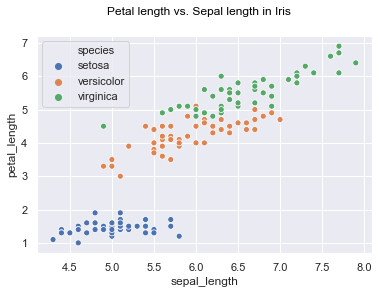

In [5]:
#fig = plt.figure(figsize=(8, 5))
plt.suptitle('Petal length vs. Sepal length in Iris')
sns.set(style='darkgrid')
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
#ax.set_ylim=(0,8)
#ax.set_xlim=(4,8)
plt.savefig("scatter.pdf")
#sns.despine()

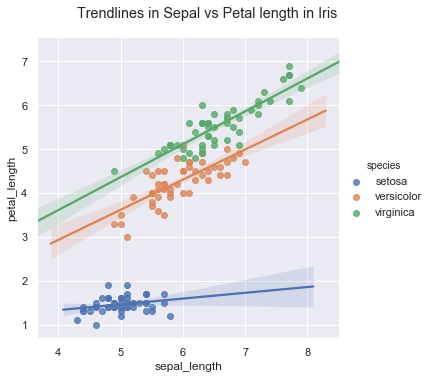

In [6]:
g = sns.lmplot(x='sepal_length', y='petal_length', hue='species', data=iris)
g.fig.suptitle('Trendlines in Sepal vs Petal length in Iris', y=1.05)
g.savefig("regplot.pdf")

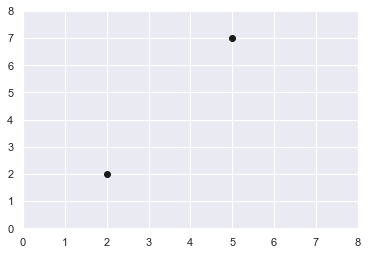

In [7]:
g, ax = plt.subplots(1,1)
x = np.array([2, 5])
y = np.array([2, 7])
ax.plot(x, y, '.k', markersize=12)
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
plt.savefig("dots.pdf")

<Figure size 432x288 with 0 Axes>

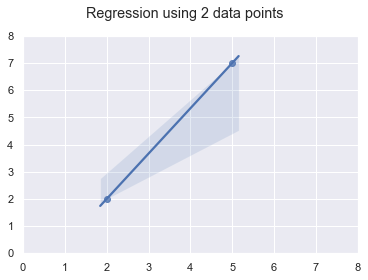

In [8]:
plt.clf()
g, ax = plt.subplots(1,1)
x = np.array([2, 5]).T
y = np.array([2, 7]).T
data = np.hstack((x, y))
sns.regplot(x, y)
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
plt.suptitle('Regression using 2 data points')
plt.savefig("reg01.pdf")

<Figure size 432x288 with 0 Axes>

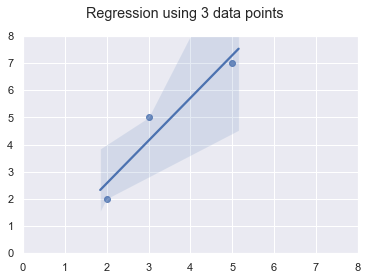

In [9]:
plt.clf()
g, ax = plt.subplots(1,1)
x = np.array([2, 5, 3]).T
y = np.array([2, 7, 5]).T
data = np.hstack((x, y))
sns.regplot(x, y)
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
plt.suptitle('Regression using 3 data points')
plt.savefig("reg02.pdf")

<Figure size 432x288 with 0 Axes>

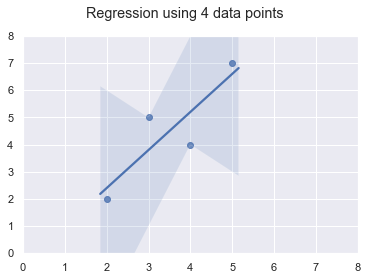

In [10]:
plt.clf()
g, ax = plt.subplots(1,1)
x = np.array([2, 5, 3, 4]).T
y = np.array([2, 7, 5, 4]).T
data = np.hstack((x, y))
sns.regplot(x, y)
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
plt.suptitle('Regression using 4 data points')
plt.savefig("reg03.pdf")